In [57]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [58]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [59]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [60]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [61]:
#Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

630

In [62]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [63]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4e462d0603aa631588b3bcd178ae4e81


In [64]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [65]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | cavalcante
Processing Record 5 of Set 1 | mombetsu
Processing Record 6 of Set 1 | samusu
City not found. Skipping...
Processing Record 7 of Set 1 | bengkulu
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | beringovskiy
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | taltal
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | berceni
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | the valley
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 

Processing Record 40 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 41 of Set 4 | roald
Processing Record 42 of Set 4 | higuey
City not found. Skipping...
Processing Record 43 of Set 4 | kiunga
Processing Record 44 of Set 4 | riyadh
Processing Record 45 of Set 4 | ust-omchug
Processing Record 46 of Set 4 | port hardy
Processing Record 47 of Set 4 | auki
Processing Record 48 of Set 4 | fenelon falls
Processing Record 49 of Set 4 | georgetown
Processing Record 50 of Set 4 | salinopolis
Processing Record 1 of Set 5 | yulara
Processing Record 2 of Set 5 | manacor
Processing Record 3 of Set 5 | port lincoln
Processing Record 4 of Set 5 | nong chik
Processing Record 5 of Set 5 | galiwinku
City not found. Skipping...
Processing Record 6 of Set 5 | bull savanna
Processing Record 7 of Set 5 | leningradskiy
Processing Record 8 of Set 5 | truth or consequences
Processing Record 9 of Set 5 | cherskiy
Processing Record 10 of Set 5 | esperance
Processing Record 11 of Set 5 | c

Processing Record 29 of Set 8 | bose
Processing Record 30 of Set 8 | fort saint john
City not found. Skipping...
Processing Record 31 of Set 8 | nynashamn
Processing Record 32 of Set 8 | douglas
Processing Record 33 of Set 8 | bara
Processing Record 34 of Set 8 | beatrice
Processing Record 35 of Set 8 | tierranueva
Processing Record 36 of Set 8 | montilla
Processing Record 37 of Set 8 | gambo
Processing Record 38 of Set 8 | oyama
Processing Record 39 of Set 8 | katangli
Processing Record 40 of Set 8 | georgiyevka
Processing Record 41 of Set 8 | wairoa
Processing Record 42 of Set 8 | victor harbor
Processing Record 43 of Set 8 | duz
City not found. Skipping...
Processing Record 44 of Set 8 | loandjili
Processing Record 45 of Set 8 | amderma
City not found. Skipping...
Processing Record 46 of Set 8 | ranot
Processing Record 47 of Set 8 | nelson bay
Processing Record 48 of Set 8 | isangel
Processing Record 49 of Set 8 | kodinsk
Processing Record 50 of Set 8 | kharp
Processing Record 1 of 

Processing Record 15 of Set 12 | masaurhi
Processing Record 16 of Set 12 | wenling
Processing Record 17 of Set 12 | pathein
Processing Record 18 of Set 12 | chadiza
Processing Record 19 of Set 12 | amasya
Processing Record 20 of Set 12 | almeirim
Processing Record 21 of Set 12 | kirakira
Processing Record 22 of Set 12 | zeya
Processing Record 23 of Set 12 | thinadhoo
Processing Record 24 of Set 12 | krapina
Processing Record 25 of Set 12 | magistralnyy
Processing Record 26 of Set 12 | vila franca do campo
Processing Record 27 of Set 12 | cockburn town
Processing Record 28 of Set 12 | walvis bay
Processing Record 29 of Set 12 | cabatuan
Processing Record 30 of Set 12 | terme
Processing Record 31 of Set 12 | tiruvottiyur
City not found. Skipping...
Processing Record 32 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 33 of Set 12 | harper
Processing Record 34 of Set 12 | morondava
Processing Record 35 of Set 12 | araouane
Processing Record 36 of Set 12 | mackay
Proc

In [66]:
len(city_data)

577

In [67]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,56.08,85,99,7.43,AU,2021-09-18 12:41:15
1,Hobart,-42.8794,147.3294,47.26,74,20,1.99,AU,2021-09-18 12:40:11
2,Cavalcante,-13.7975,-47.4583,83.19,25,5,10.16,BR,2021-09-18 12:42:43
3,Mombetsu,44.3525,143.3525,56.28,92,4,4.81,JP,2021-09-18 12:42:44
4,Bengkulu,-3.8004,102.2655,77.20,87,69,5.66,ID,2021-09-18 12:42:44
5,Iqaluit,63.7506,-68.5145,33.53,93,90,4.61,CA,2021-09-18 12:42:45
6,Albany,42.6001,-73.9662,69.39,94,39,2.73,US,2021-09-18 12:40:07
7,Barrow,71.2906,-156.7887,28.42,86,20,9.22,US,2021-09-18 12:42:45
8,Ushuaia,-54.8000,-68.3000,33.46,86,20,3.44,AR,2021-09-18 12:38:08
9,Beringovskiy,63.0500,179.3167,42.89,72,7,7.61,RU,2021-09-18 12:42:46


In [68]:
#reorder our columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2021-09-18 12:41:15,-33.6500,115.3333,56.08,85,99,7.43
1,Hobart,AU,2021-09-18 12:40:11,-42.8794,147.3294,47.26,74,20,1.99
2,Cavalcante,BR,2021-09-18 12:42:43,-13.7975,-47.4583,83.19,25,5,10.16
3,Mombetsu,JP,2021-09-18 12:42:44,44.3525,143.3525,56.28,92,4,4.81
4,Bengkulu,ID,2021-09-18 12:42:44,-3.8004,102.2655,77.20,87,69,5.66
...,...,...,...,...,...,...,...,...,...
572,Priargunsk,RU,2021-09-18 12:45:57,50.3691,119.1012,41.86,79,85,3.53
573,Kholm,RU,2021-09-18 12:45:57,59.2667,32.8500,50.34,56,100,7.58
574,Aykhal,RU,2021-09-18 12:45:58,66.0000,111.5000,28.87,78,9,3.27
575,Basco,PH,2021-09-18 12:45:58,20.4487,121.9702,84.60,79,24,14.58


In [69]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [70]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

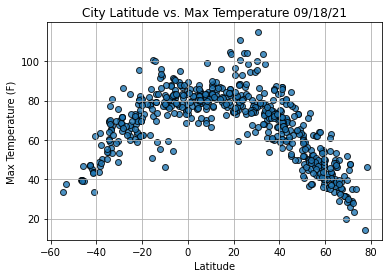

In [71]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

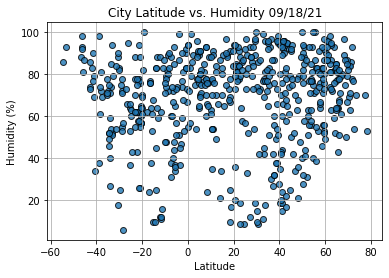

In [72]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

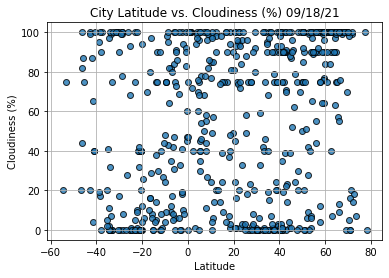

In [73]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

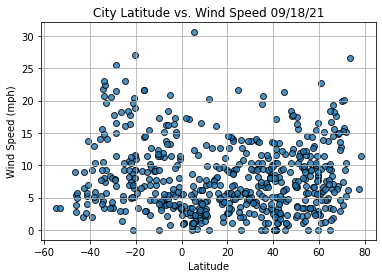

In [74]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [75]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [76]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Mombetsu,JP,2021-09-18 12:42:44,44.3525,143.3525,56.28,92,4,4.81
5,Iqaluit,CA,2021-09-18 12:42:45,63.7506,-68.5145,33.53,93,90,4.61
6,Albany,US,2021-09-18 12:40:07,42.6001,-73.9662,69.39,94,39,2.73
7,Barrow,US,2021-09-18 12:42:45,71.2906,-156.7887,28.42,86,20,9.22
9,Beringovskiy,RU,2021-09-18 12:42:46,63.0500,179.3167,42.89,72,7,7.61


In [77]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

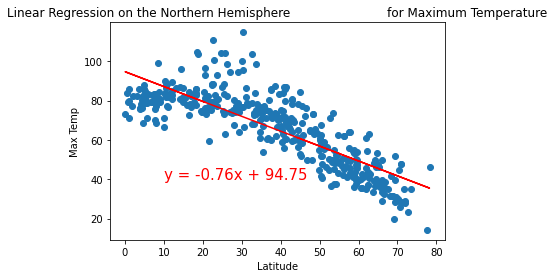

In [78]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

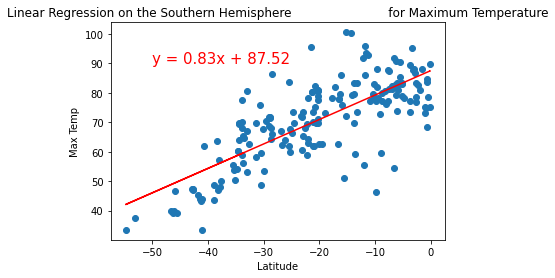

In [79]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

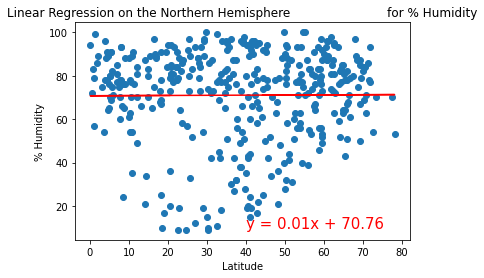

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

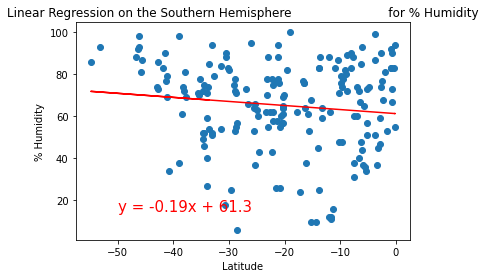

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

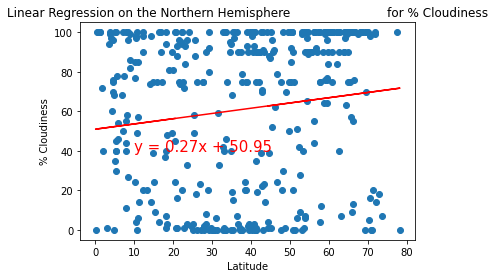

In [82]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,40))

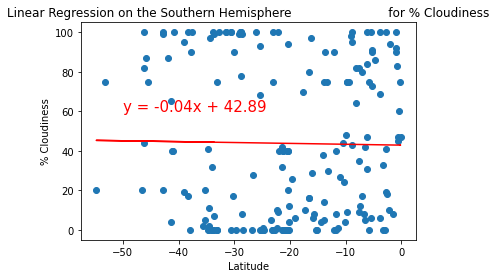

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

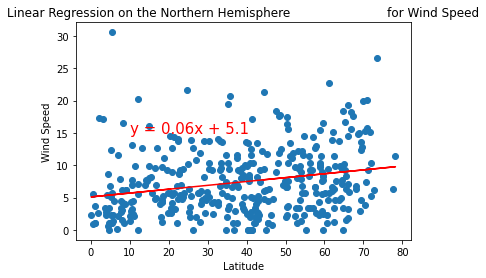

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,15))

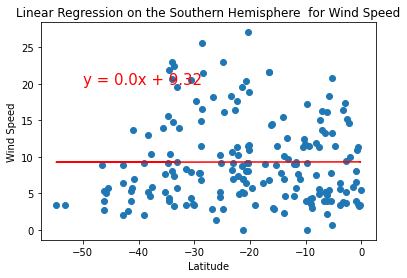

In [85]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere  for Wind Speed', 'Wind Speed',(-50,20))